In [7]:
#Task 1: Exploratory Data Analysis (EDA):
import pandas as pd

 # Load the dataset
 df = pd.read_csv(r'D:\Data since couress\PCA\PCA\wine.csv')

 # Perform basic data exploration
 print("Basic Data Exploration:")
 print(df.info())
 print(df.describe())

Basic Data Exploration:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium 

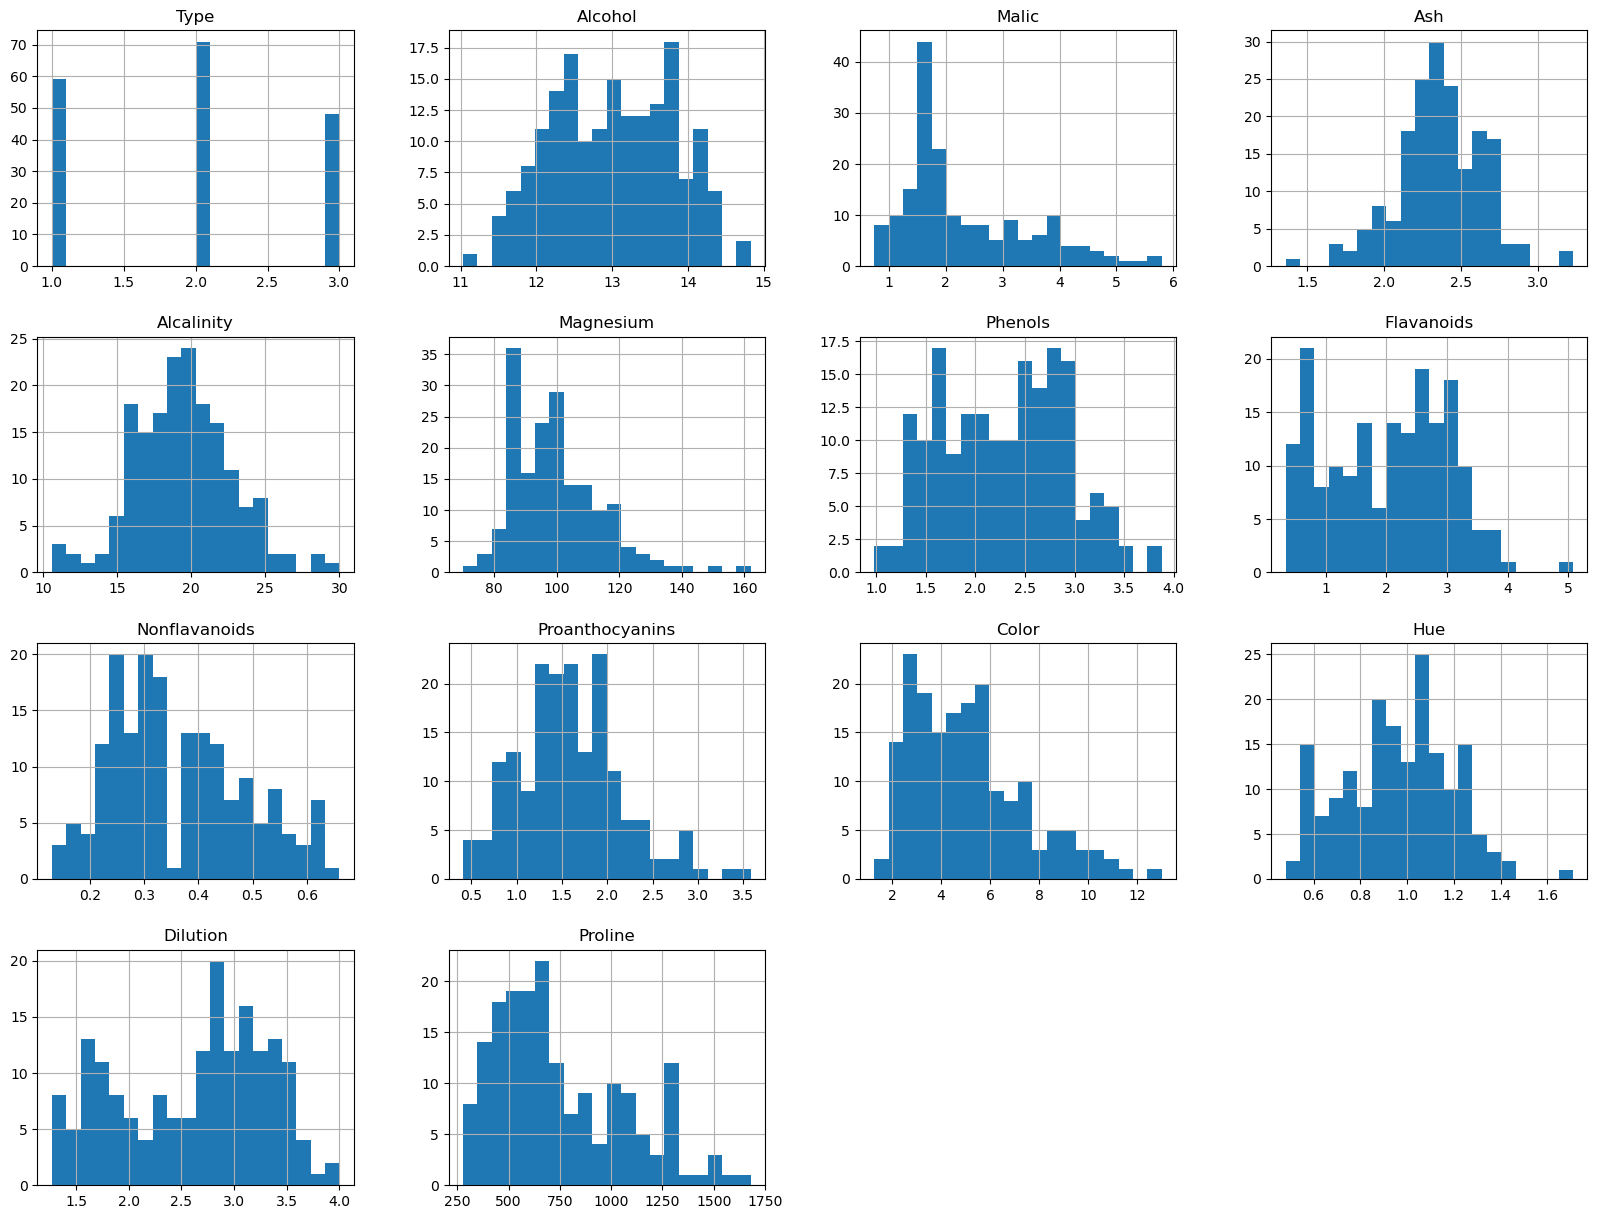

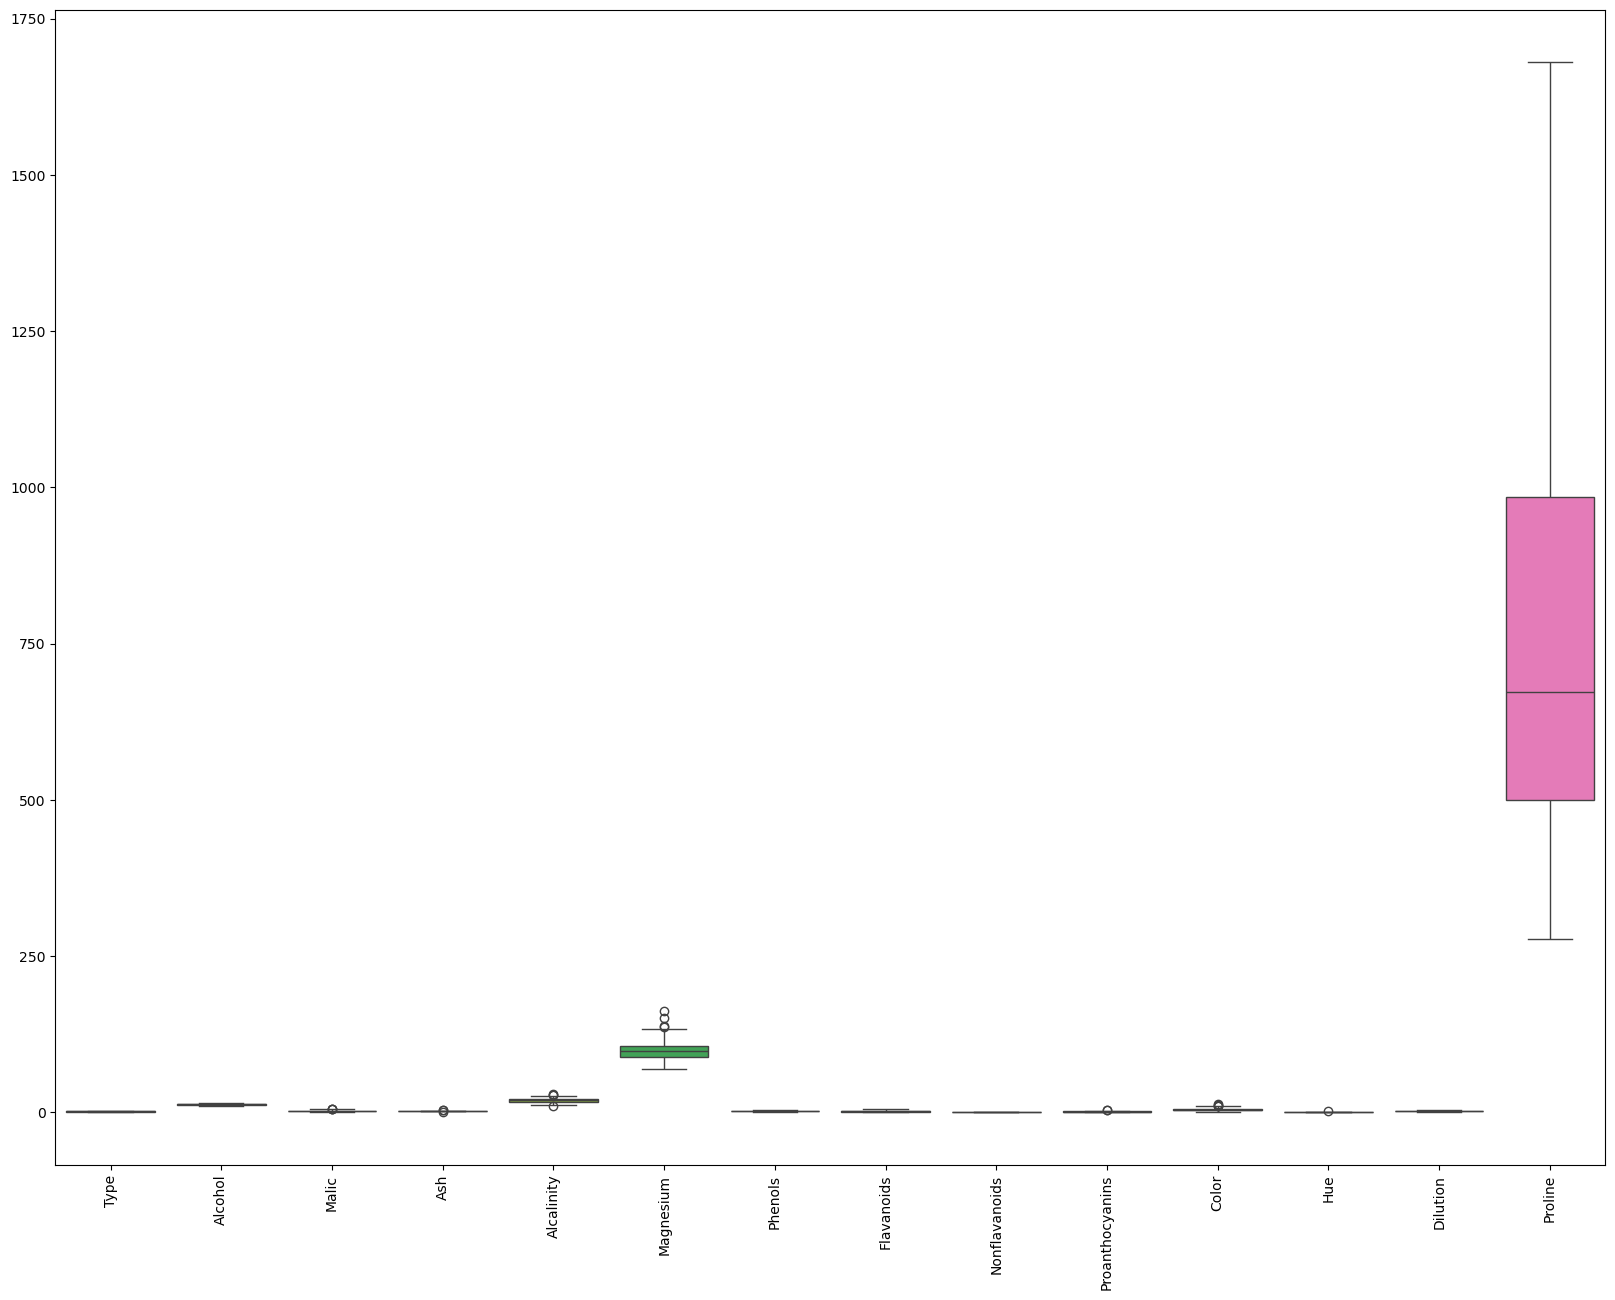

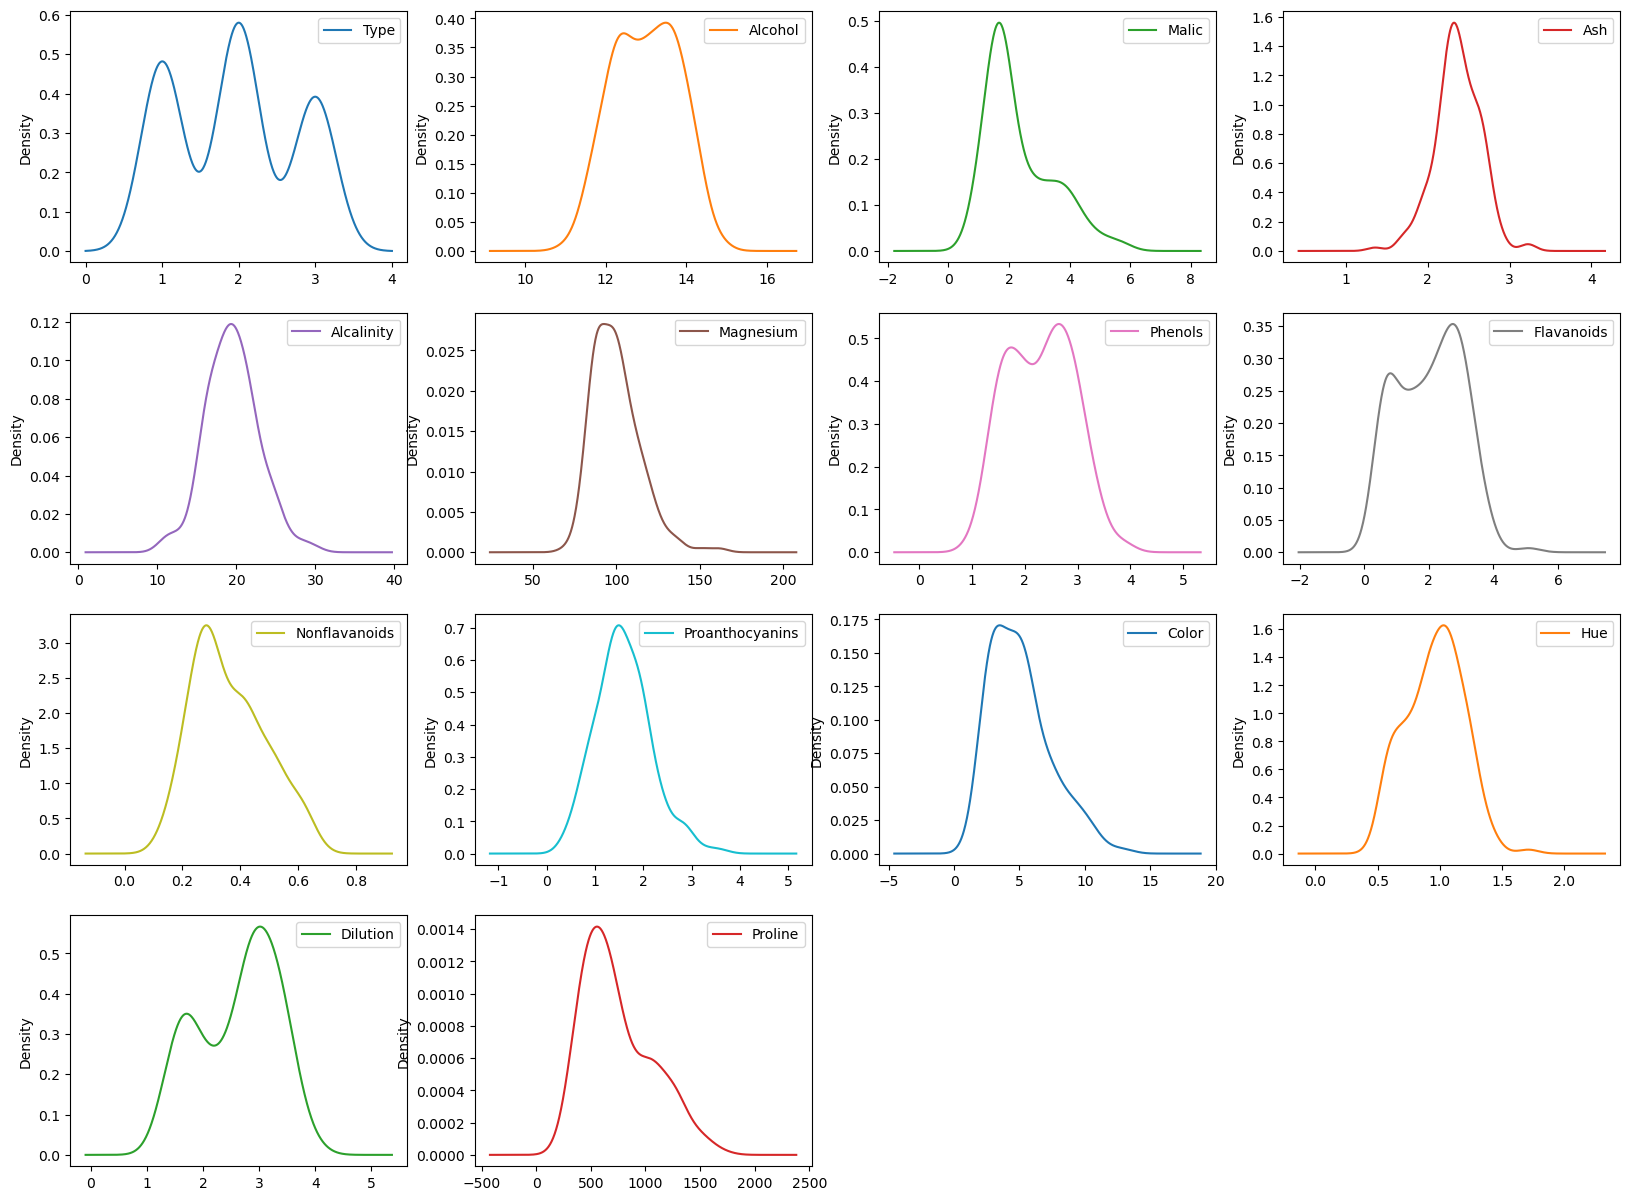

In [27]:
 import matplotlib.pyplot as plt
 import seaborn as sns

 # Histograms
 df.hist(bins=20, figsize=(20, 15))
 plt.show()

 # Box plots
 plt.figure(figsize=(20, 15))
 sns.boxplot(data=df)
 plt.xticks(rotation=90)
 plt.show()

 # Density plots
 df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(20, 15))
 plt.show()

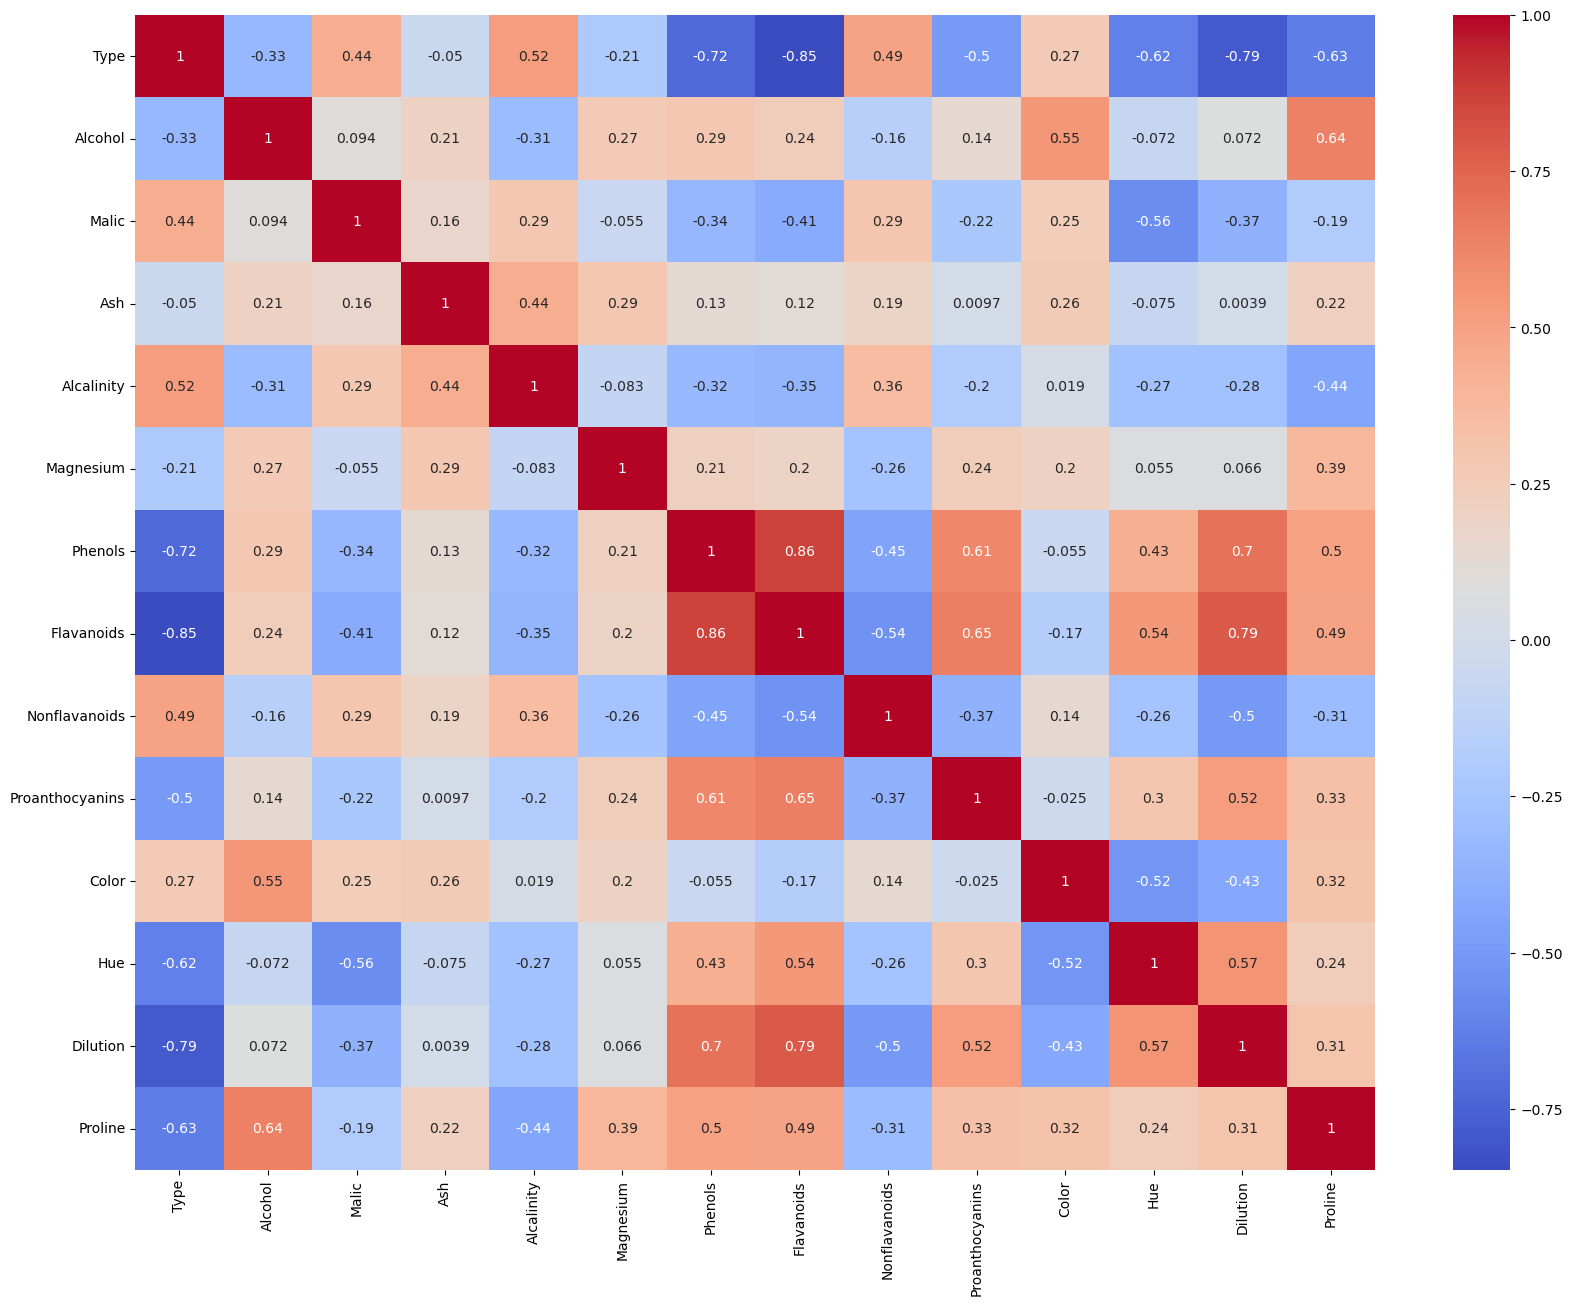

In [31]:
 # Correlation matrix
 correlation_matrix = df.corr()
 plt.figure(figsize=(20, 15))
 sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
 plt.show()

In [5]:
 import pandas as pd

 # Load the dataset
 df = pd.read_csv(r'D:\Data since couress\PCA\PCA\wine.csv')

 # Perform basic data exploration
 print("Basic Data Exploration:")
 print(df.info())
 print(df.describe())

Basic Data Exploration:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium 

In [9]:
 from sklearn.preprocessing import StandardScaler

 # Standardize the features
 features = df.columns[1:]  # Exclude the target column
 x = df.loc[:, features].values
 x = StandardScaler().fit_transform(x)

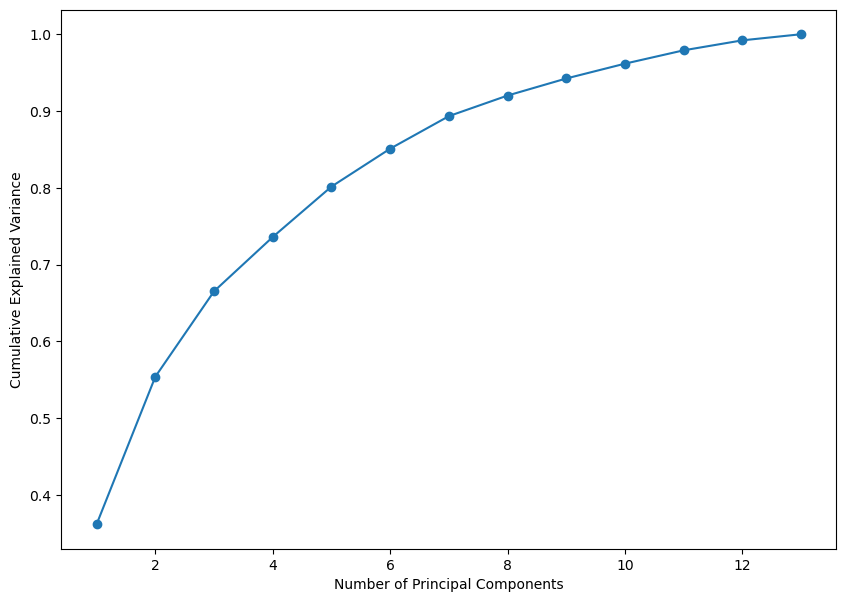

In [13]:
 from sklearn.decomposition import PCA
 import matplotlib.pyplot as plt

 # Apply PCA
 pca = PCA()
 principalComponents = pca.fit_transform(x)

 # Determine the optimal number of principal components
 plt.figure(figsize=(10, 7))
 plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
 plt.xlabel('Number of Principal Components')
 plt.ylabel('Cumulative Explained Variance')
 plt.show()

In [15]:
 # Transform the dataset
 pca = PCA(n_components=2)  # Adjust the number of components as needed
 principalComponents = pca.fit_transform(x)
 principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

In [25]:
import os
os.environ['OMP_NUM_THREADS'] = '1'


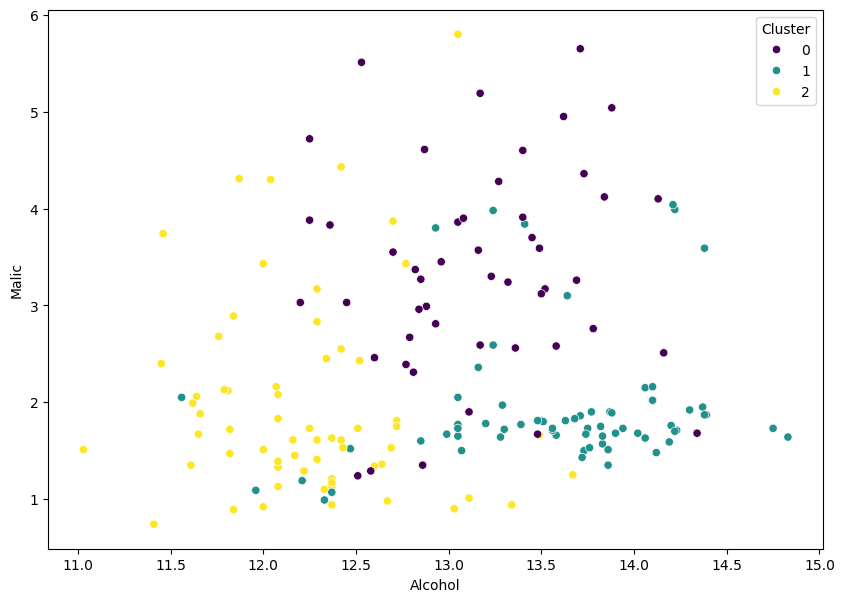

In [27]:
 import matplotlib.pyplot as plt
 import seaborn as sns

 plt.figure(figsize=(10, 7))
 sns.scatterplot(x='Alcohol', y='Malic', hue='Cluster', data=df, palette='viridis')
 plt.show()


In [29]:
 from sklearn.metrics import silhouette_score, davies_bouldin_score

 # Silhouette score
 silhouette_avg = silhouette_score(x, df['Cluster'])
 print(f'Silhouette Score: {silhouette_avg}')

 # Davies-Bouldin index
 db_index = davies_bouldin_score(x, df['Cluster'])
 print(f'Davies-Bouldin Index: {db_index}')

Silhouette Score: 0.2806817957373884
Davies-Bouldin Index: 1.393136248943783
